<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [3]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

In [7]:
sigma = 15  # Стандартное отклонение - корень из дисперсии 
Z = 1.96  #  %   # Квантиль нормального распределения (нашли в таблице для a = 0.05)
Delta = 3 #%         #Погрешность
n = int(((sigma*Z)/Delta)**2) #через int для округления ответа
n

96

При заданных условиях нам необходима выборка из 96 точек (измерений)

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [15]:
# Задаем объем выборки
n_1 = 25 
# Задаем функцию дов. интервала conf_int
# Указываем параметры функции, где loc = среднее значение (mean), scale = std (стандартное отклонение)
conf_int = stats.norm.interval(0.98, loc=130, scale=15 / np.sqrt(n_1))
int(conf_int[1]-conf_int[0])

13

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [24]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170

tvalue, pvalue = stats.ttest_ind(mens, womens)
tvalue, pvalue

(3.6635841716708892, 0.00024875321033580573)

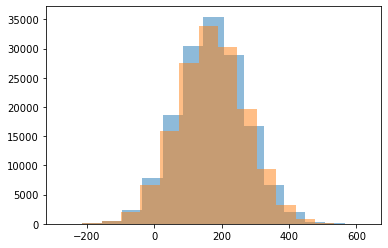

In [21]:
plt.hist(mens, bins=15, alpha=0.5);
plt.hist(womens, bins=15, alpha=0.5);

Мы получили p < a

**различия между выборками значительное!**

Доказать утверждение из задачи с помощью t-теста мы не можем. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [27]:
sigma = 150  # Стандартное отклонение - корень из дисперсии 
Z = 1.96  #  %   # Квантиль нормального распределения (нашли в таблице для a = 0.05)
Delta = 50 / 150 * 100 #%         #Погрешность
n = int(((sigma*Z)/Delta)**2) #через int для округления ответа
n

77

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [28]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [30]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

p-value = 0.35, что значительно выше уровня значимости (0.05)

Статистически, мы не можем отбросить гипотезу о том, что маг не может предсказывать погоду (учитывая уровень значимости)

**Соответственно, не можем однозначно утверждать, что маг может предсказывать погоду**
Для подобных утверждений недостаточно данных

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [31]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [32]:
def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [34]:
answ = mean_confidence_interval(data, confidence=0.9)
print (f'Доверительный интервал находятся в пределах от {answ[0]} до {answ[2]}')

Доверительный интервал находятся в пределах от 6.074074746111319 до 7.183068111031539


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [36]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [39]:
tvalue, pvalue = stats.ttest_ind(A, B)
tvalue, round(pvalue,5)

(11.865233896372924, 0.0)

In [46]:
# Посмотрим на среднеарифметические значения данных выборок
print(np.mean(A))
print(np.mean(B))

6.446428571428571
4.147368421052631


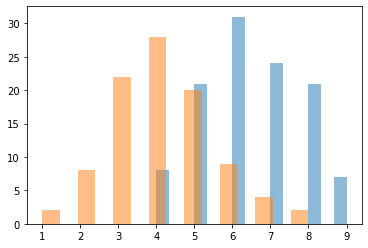

In [40]:
# Визуализируем распределние в обоих выборках
plt.hist(A, bins=15, alpha=0.5);
plt.hist(B, bins=15, alpha=0.5);

На основании занчения средних, p-value мы можем сказать, что две этих выборки различны

**Важно!!! Если мы рассматриваем их, как выборки, которые характеризуют генеральную совокупность**

Это могут быть неслучайные выборки из нормально распределнного множества. 
Соединим множества и визуализируем результат. 

(array([ 2.,  8., 22., 36., 41., 40., 28., 23.,  7.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

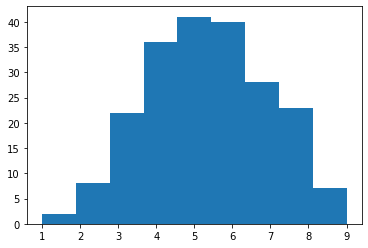

In [55]:
С = A + B
plt.hist(С, bins=9)

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

При условии, что мы приняли уровень значимости за 0.05, мы получаем (p-value < a), что позволяет нам отвергнуть нулевую гипотезу (распределение нормальное). 
Дальше работаем с альтернативной гипотезой. **Распределение ненормальное** 

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [56]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)
# Подсказка, обратите внимание на Two-sample T-test

In [64]:
stat, pv = stats.ttest_rel(A, B)
if pv < 0.05:
    print(f'p-value = {pv}. Имеются значимые различия! \n2-ой и 3-ий пункт задания выполнять не требуется.')

p-value = 0.042739435733033855. Имеются значимые различия! 
2-ой и 3-ий пункт задания выполнять не требуется.
